# SGD

In [2]:
# These are the libraries we are going to use in the lab.

import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

## Generic class for plotting

In [28]:
# Class for visualizing the information
class PlotErrorSurface:
    def __init__(self, w_range: int, b_range: int, X, Y, n_samples=30, go=True):
        '''
        Parameters:
        w_range: int
            range of w
        '''
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((n_samples, n_samples))
        self.x = X.numpy()
        self.y = Y.numpy()
        i = 0
        for wi, bi in zip(w, b):
            j = 0
            for w_ij, b_ij in zip(wi, bi):
                Z[i, j] = np.mean((self.y - w_ij * self.x + b_ij) ** 2)
                j += 1
            i += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.losses = []
        self.n = 0
        if go:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            ax = plt.axes(projection='3d')
            ax.plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            ax.set_title('Loss Surface')
            ax.set_xlabel('w')
            ax.set_ylabel('b')
            ax.set_zlabel('loss')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.contour(self.w, self.b, self.Z)
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()

    # Setter
    def set_para_loss(self, W, B, loss):
        self.n += 1
        self.W.append(W)
        self.B.append(B)
        self.losses.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.losses, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()


## Now the code starts

### Prerequisites 

In [4]:
# Set random seed

torch.manual_seed(1)

In [8]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1)
print(X.size())
# Reshape it into a column vector
X = X.view(-1, 1)
print(X.size())
# Generate the target according to the true function
f = 1 * X - 1
# Add noise
Y = f + 0.1 * torch.randn(X.size())

torch.Size([60])
torch.Size([60, 1])


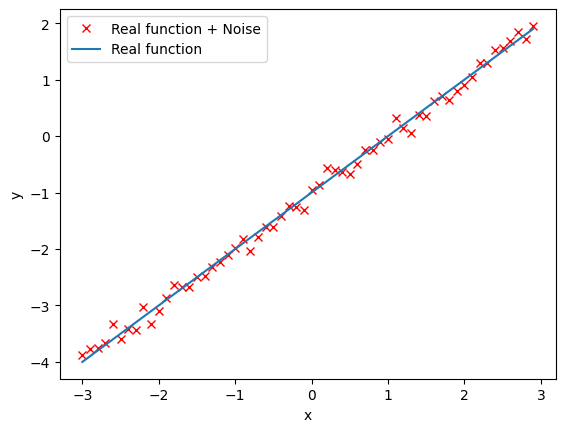

In [10]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Real function + Noise')
plt.plot(X.numpy(), f.numpy(), label = 'Real function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Cost functio (Total loss)

In [15]:
# Define the forward function

def forward(x):
    return w * x + b

In [12]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 640x480 with 0 Axes>

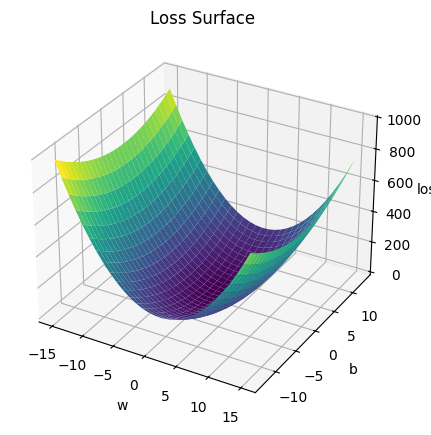

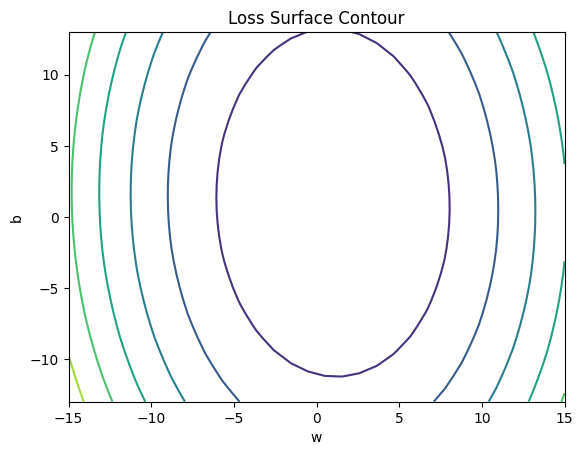

In [29]:
# Create plot_error_surfaces for viewing the data

get_surface = PlotErrorSurface(15, 13, X, Y, 30)

### Train: Batch Gradient Descent

In [14]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

In [17]:
# Define learning rate and create an empty list for containing the loss for each iteration.

l_r = 0.1
bgd_losses = []

In [30]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        bgd_losses.append(loss)
        
        # backward pass: compute gradient of the loss
        # with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - l_r * w.grad.data
        b.data = b.data - l_r * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

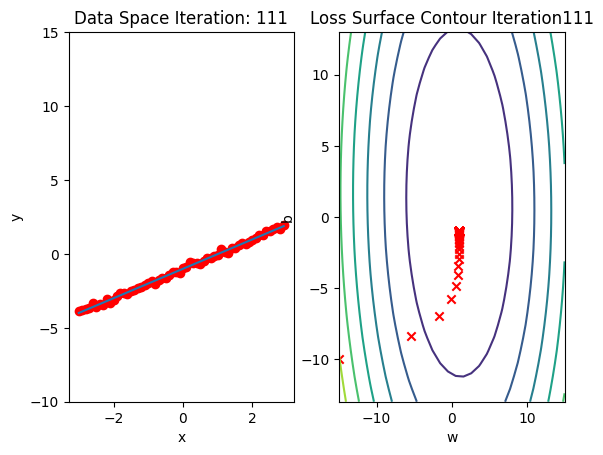

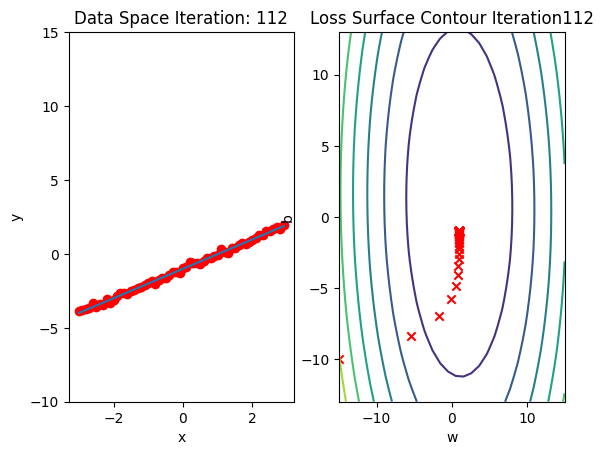

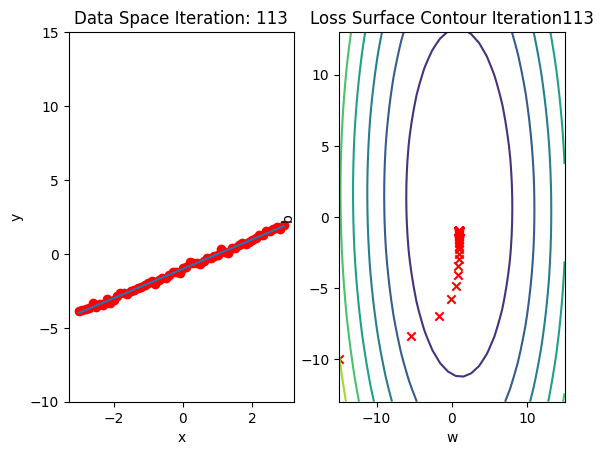

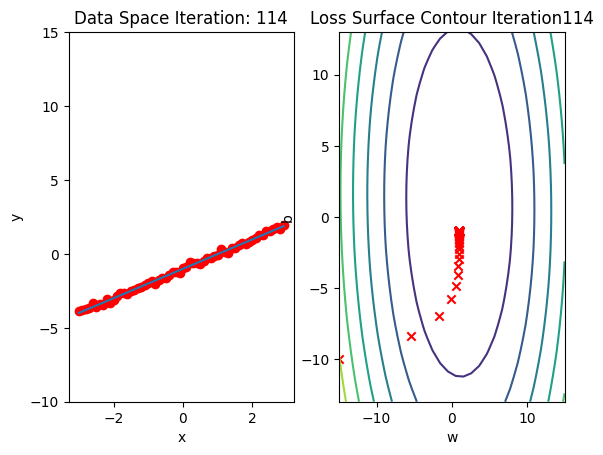

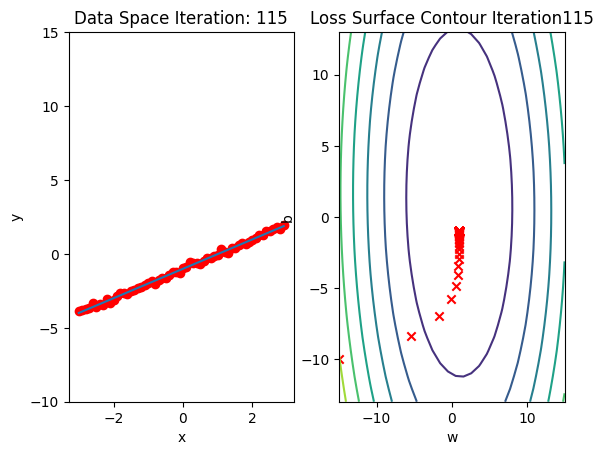

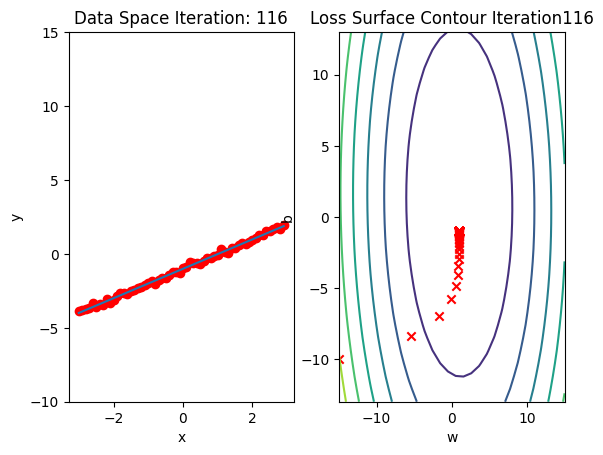

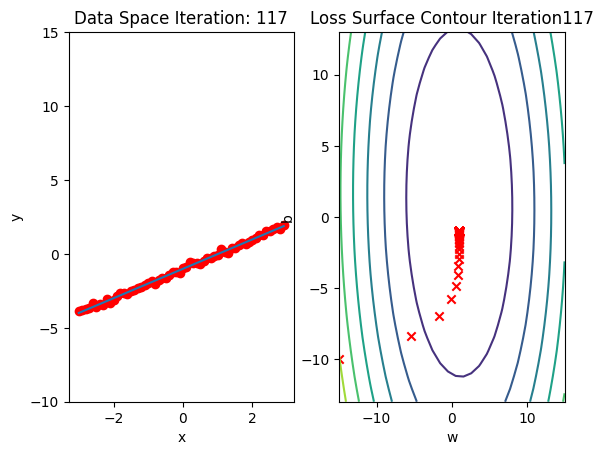

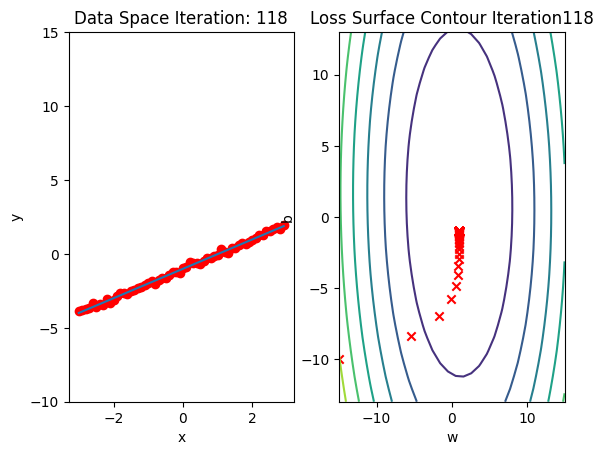

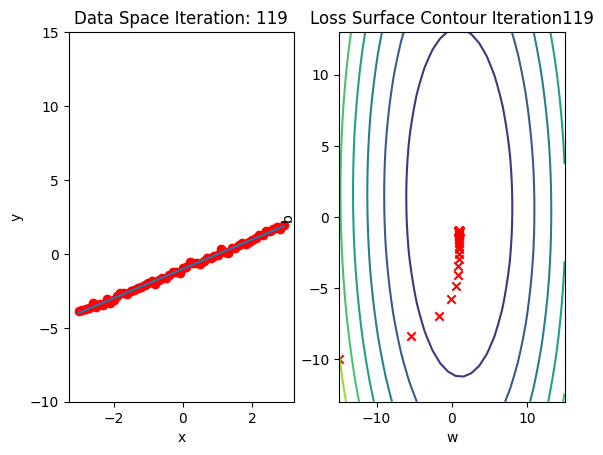

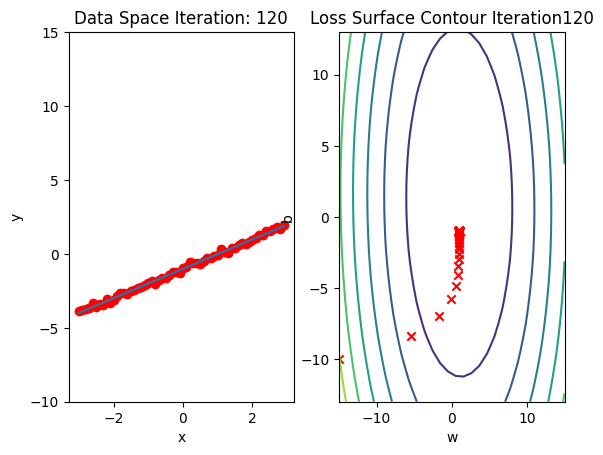

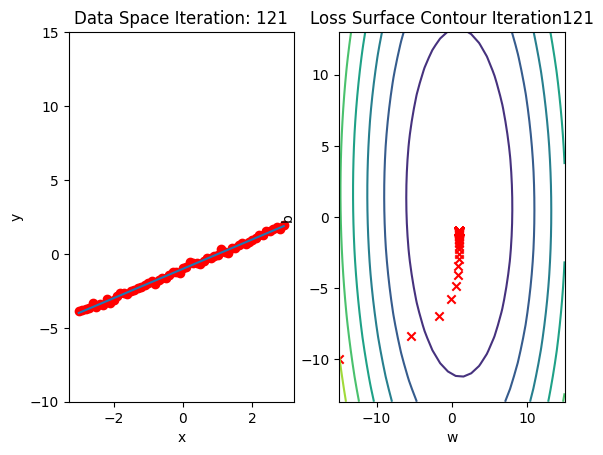

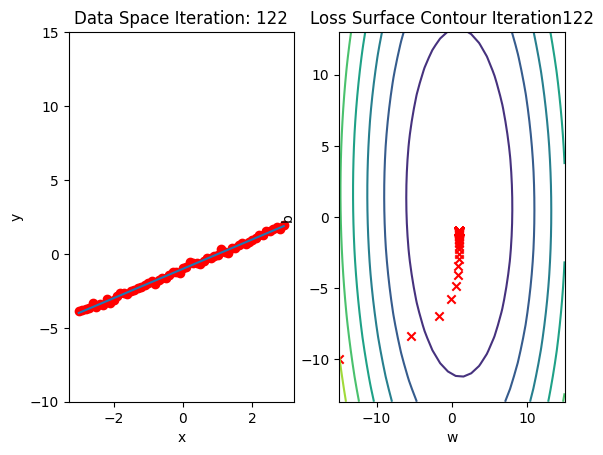

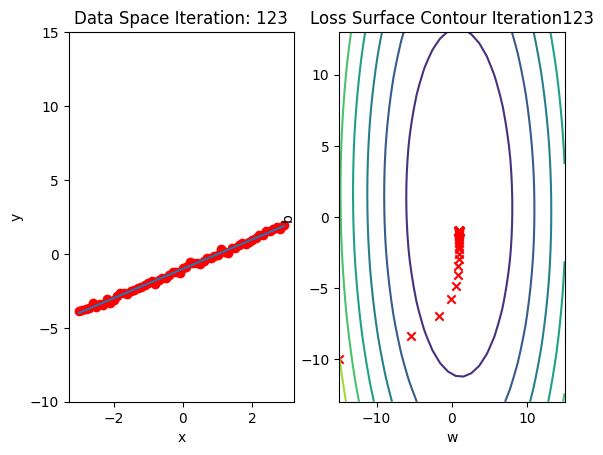

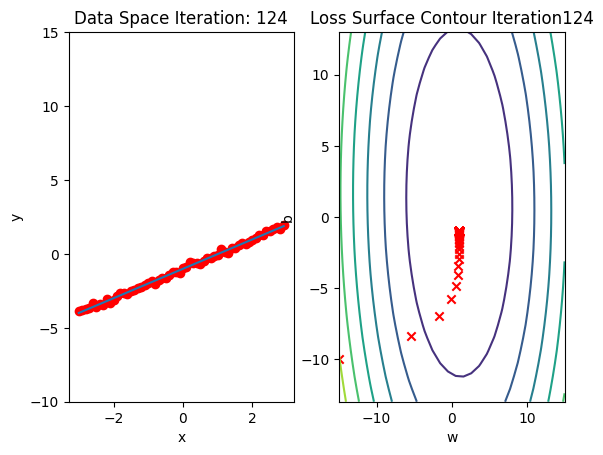

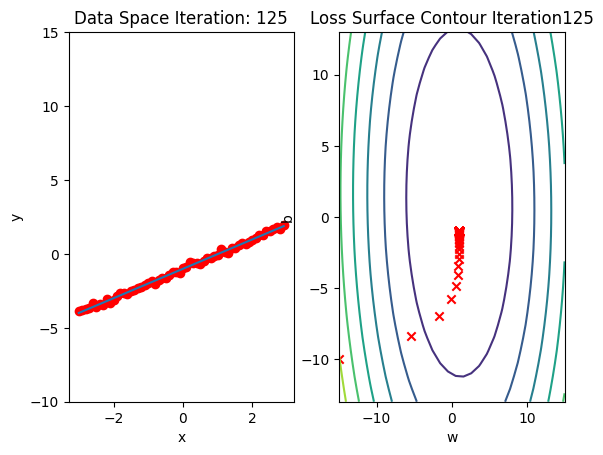

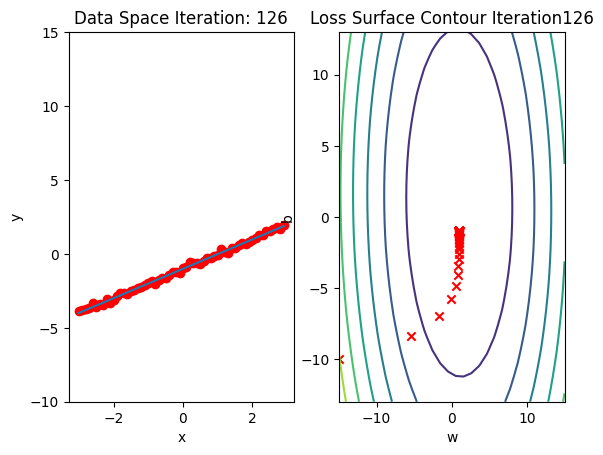

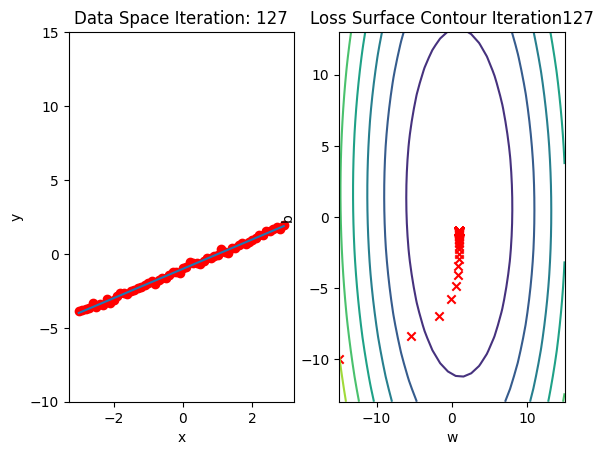

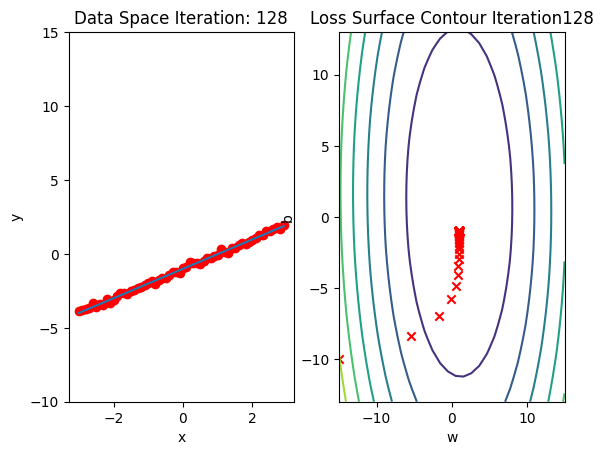

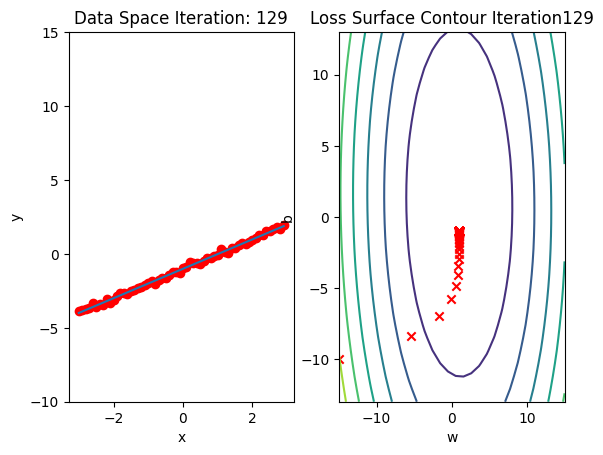

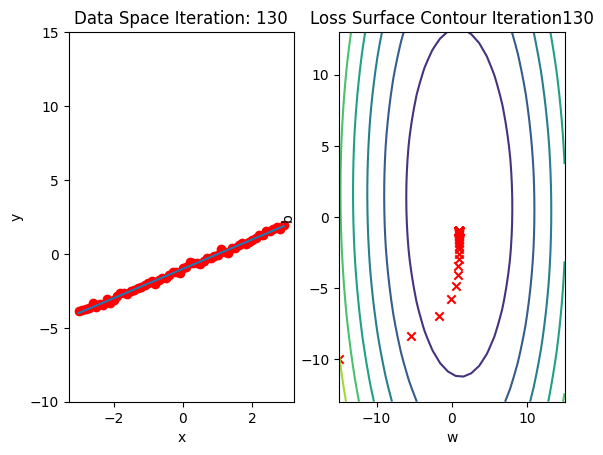

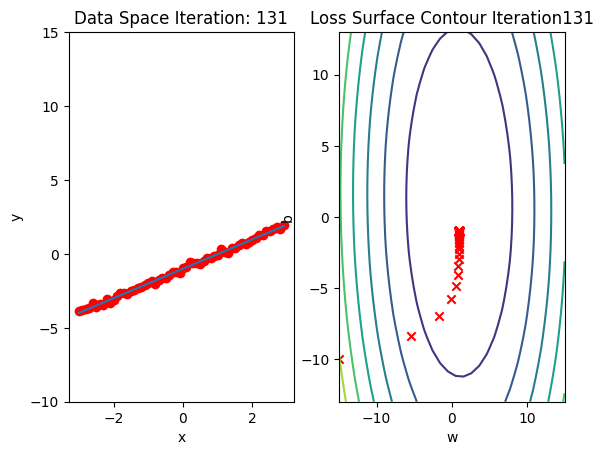

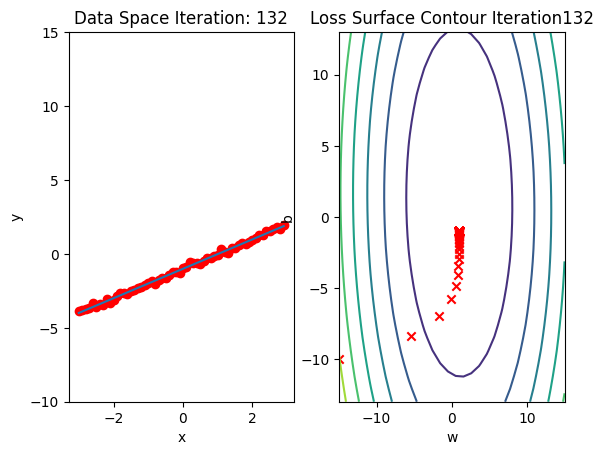

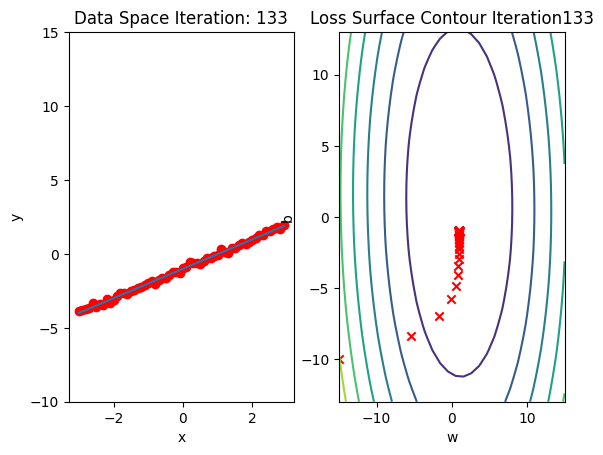

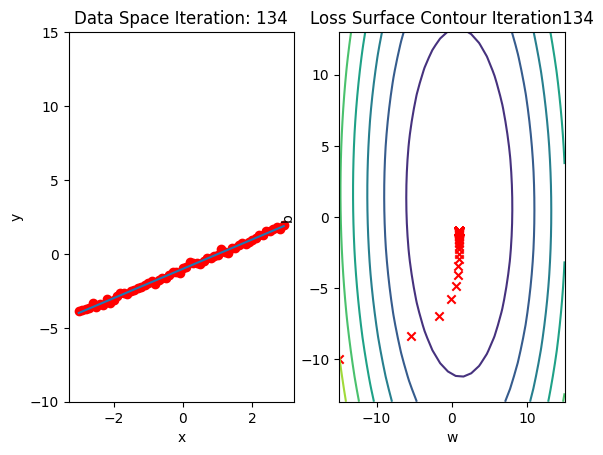

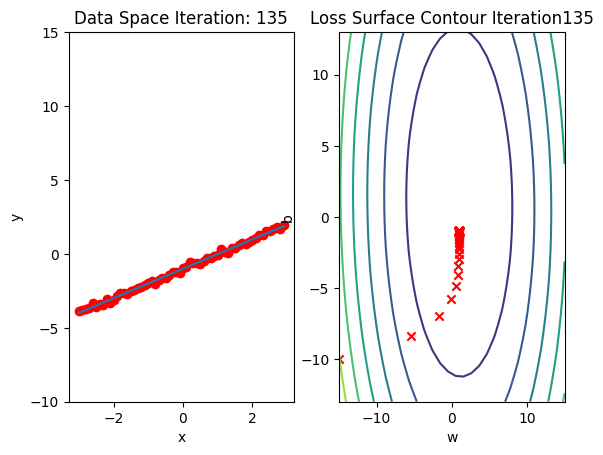

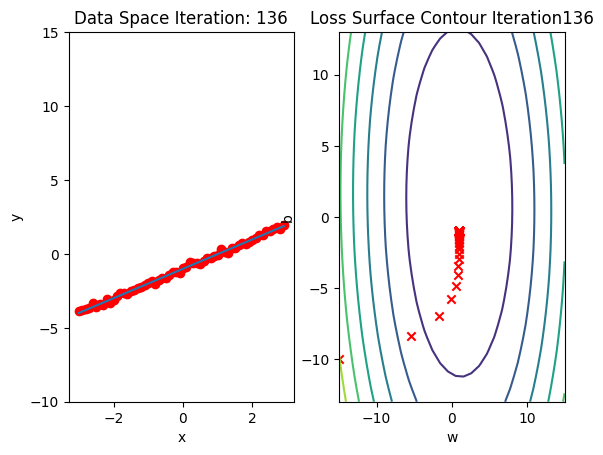

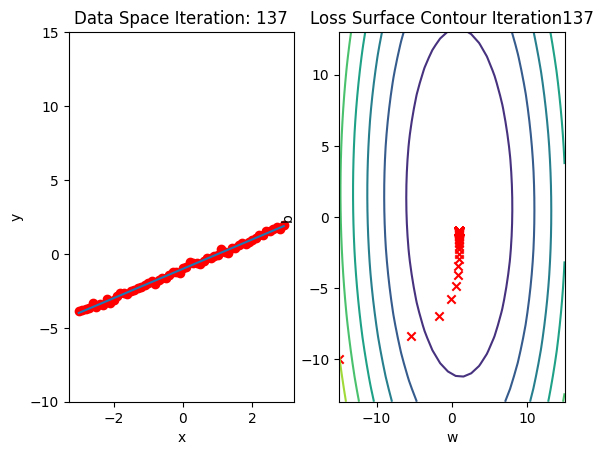

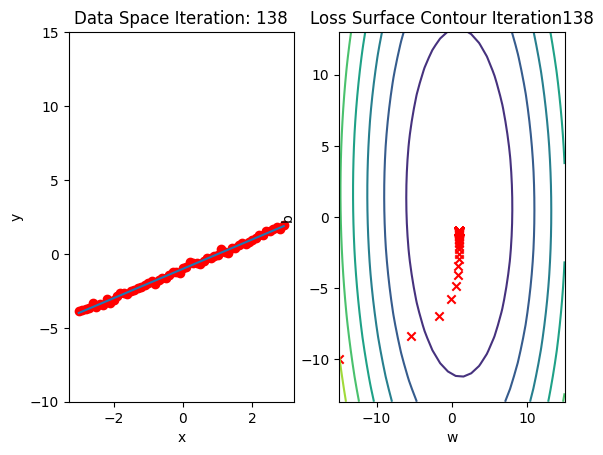

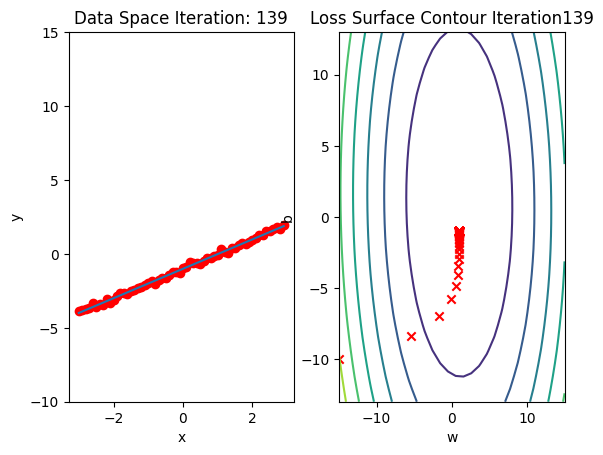

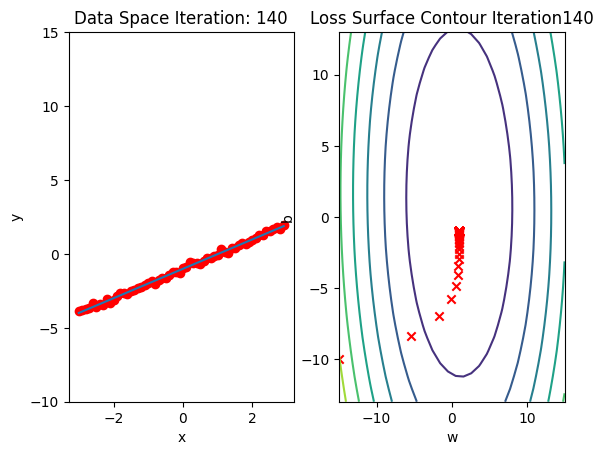

In [33]:
# Train the model with 10 iterations

train_model(30)

### Train: Stochastic Gradient Descent

In [34]:
# Create plot_error_surfaces for viewing the data

get_surface = PlotErrorSurface(15, 13, X, Y, 30, go=False)

In [35]:
# The function for training the model

sgd_losses = []
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

def train_model_SGD(iter):
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code
        # we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        sgd_losses.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - l_r * w.grad.data
            b.data = b.data - l_r * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

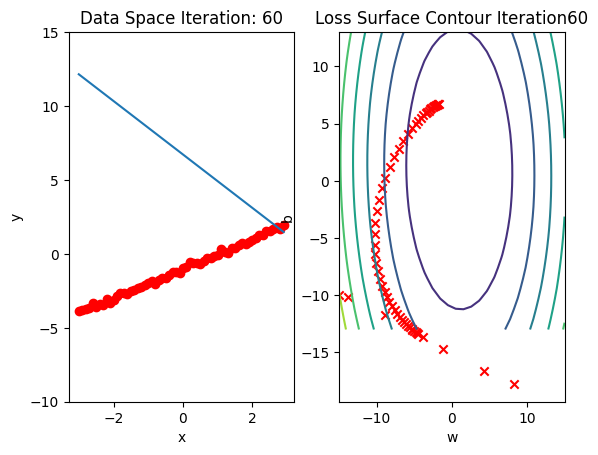

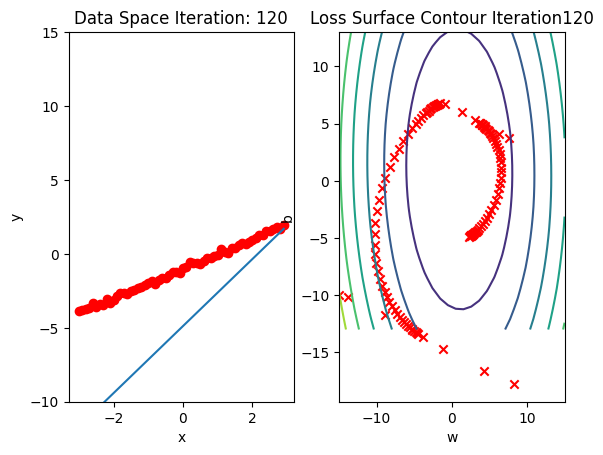

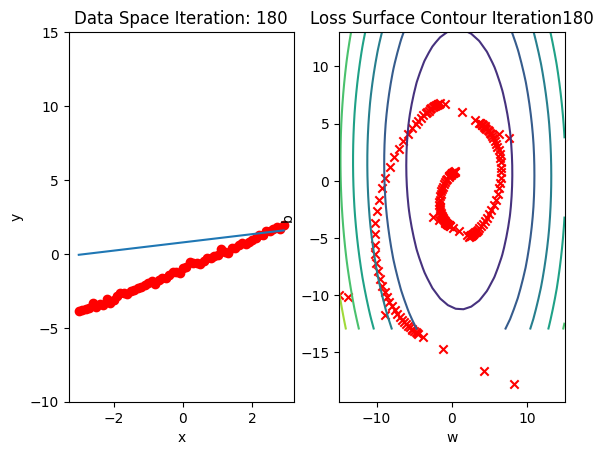

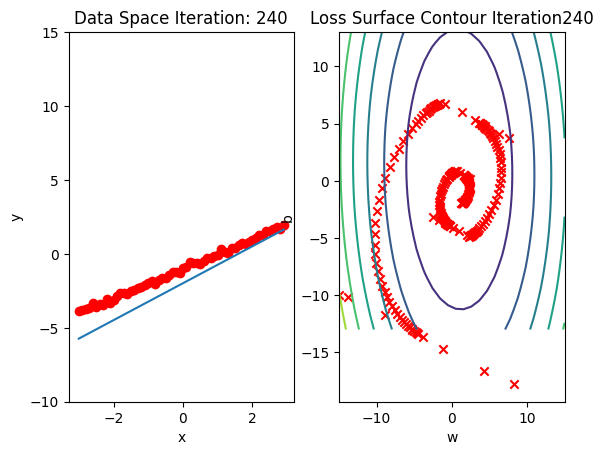

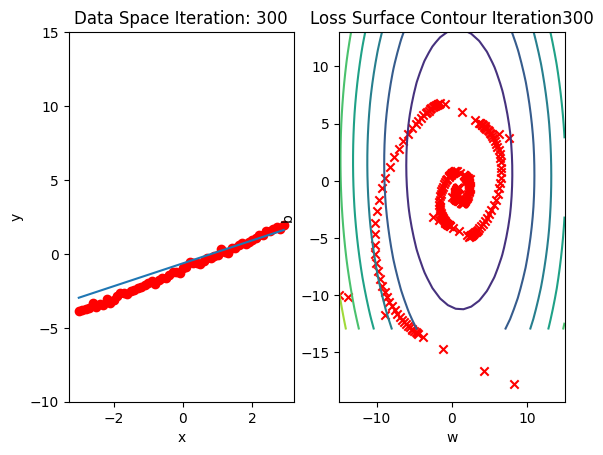

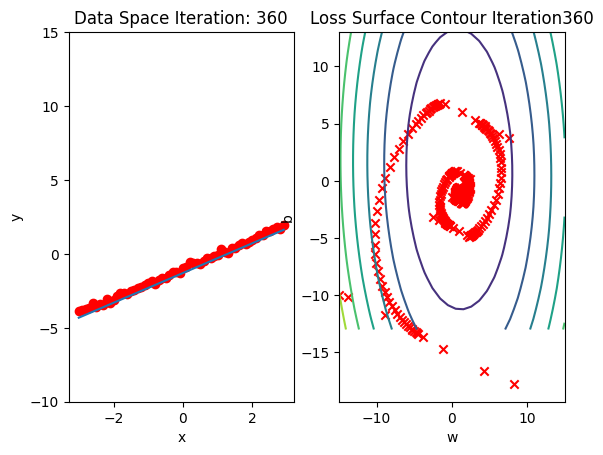

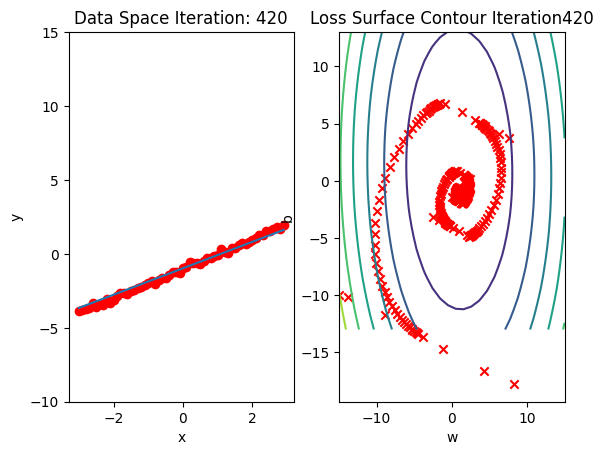

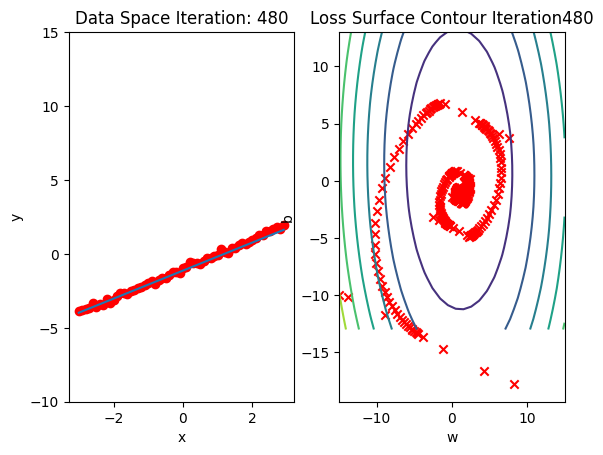

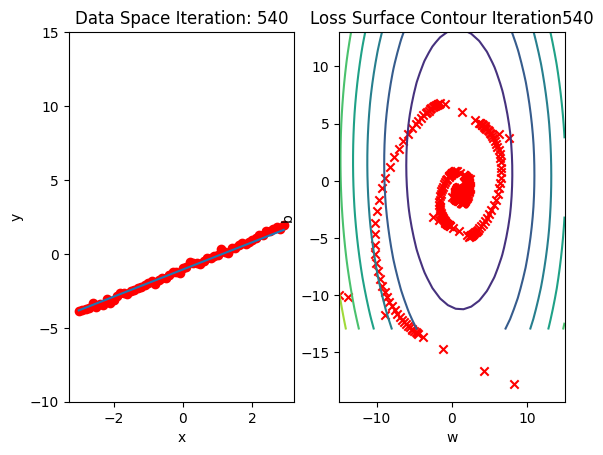

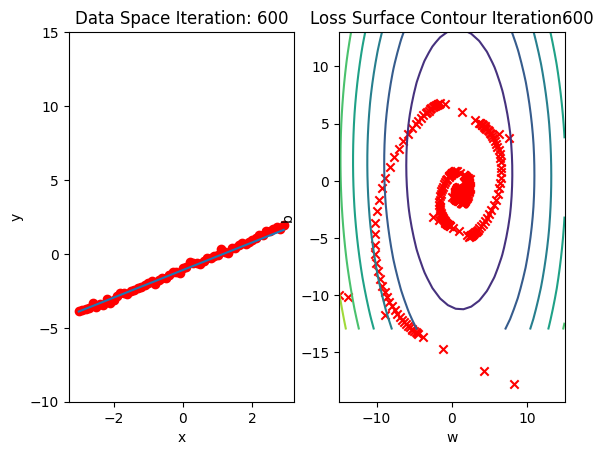

In [36]:
# Train the model with 10 iterations

train_model_SGD(10)

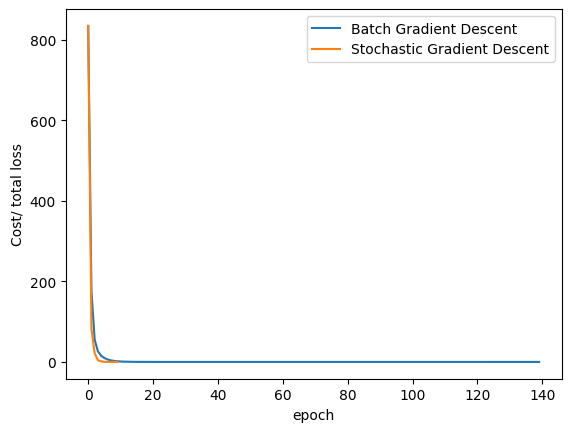

In [37]:
# Plot out the LOSS_BGD and LOSS_SGD
bgd_losses= [ loss.detach().numpy() for loss in bgd_losses]
plt.plot(bgd_losses, label="Batch Gradient Descent")
plt.plot(sgd_losses, label="Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()